# SI 330 - Homework #3: Text Processing

In ways that we still have yet to fully comprehend, the 2016 presidential election changed the fate of US history. Underdog Donald J Trump shocked the world, upsetting frontrunner Hilary Clinton. Clinton and many others have gone on record saying they believe the  "email controversy", which became a major point of contention just days before the election, contributed mightily to her defeat. 

On March 16, 2016 WikiLeaks launched a searchable archive for over 30 thousand emails & email attachments sent to and from Hillary Clinton's private email server while she was Secretary of State. The 50,547 pages of documents span from 30 June 2010 to 12 August 2014. 7,570 of the documents were sent by Hillary Clinton. The emails were made available in the form of thousands of PDFs by the US State Department as a result of a Freedom of Information Act request. More PDFs were made available on February 29, 2016, and a set of additional 995 emails was imported up to February 2, 2018.

In July 2016, FBI Director James Comey stated that the bureau did not recommend charges against Hilary after thoroughly investigating her emails, but then out of the blue 11 days before the election, Comey reopened the investigation based on new emails. This sent the media into a frenzy. Part of the controversy was surrounding whether or not classified emails sent on the private server were a national security breach. The FBI eventually deemed Clinton's new emails harmless just 2 days before the election.

The original dataset is available via https://wikileaks.org/clinton-emails/ and a more usable format of it is available via https://github.com/Mithileysh/Email-Datasets/tree/master/Hillary%20Clinton%20Datasets.  The data provided for this assignment are from the latter site.

As in previous homework assignments, 5 points are allocated to conforming to PEP-8 code style guidelines, and 5 points are allocated to spelling, punctuation, grammar, and following the submission guidelines.  The remaining 40 points are distributed as shown below.

We recommend you spend some time familiarizing yourself with the dataset.  In particular, you should strive to understand the relationships between the different CSV files and the location of different pieces of information.

## Name: Ryan Berger 

In [69]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

In [70]:
emails = pd.read_csv('Hillary Clinton Datasets/Emails.csv')

In [71]:
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [72]:
emails.shape

(7945, 22)

In [73]:
emails.ExtractedBodyText.iloc[4]

'H <hrod17@clintonemail.com>\nFriday, March 11, 2011 1:36 PM\nHuma Abedin\nFw: H: Latest: How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx\nPis print.'

_____________

### Q1: (2 points)
How many email messages did Hillary Clinton send?  How many did she receive?

Hint: start by looking up Hillary Clinton's PersonID in the Persons.csv table.

In [171]:
persons = pd.read_csv('Hillary Clinton Datasets/Persons.csv')
receivers = pd.read_csv('Hillary Clinton Datasets/EmailReceivers.csv')

hillary = persons['Id'].loc[persons['Name'] == 'Hillary Clinton']
hillary_id = hillary.iloc[0]

hillary_sent = len(emails.loc[emails['SenderPersonId'] == hillary_id])
hillary_received = len(receivers.loc[receivers['PersonId'] == hillary_id])

display('Emails sent: ' +  str(hillary_sent))
display('Emails received: ' + str(hillary_received))

'Emails sent: 1993'

'Emails received: 5587'

To find the amount of emails that Hillary Clinton sent and received, I first found her ID in the persons dataframe. Then, I used it to find the number of emails she both sent and received by finding the number of emails where her ID is in the 'SenderPersonId' column in the emails dataframe and 'PersonId' in the email receivers dataframe respectively. With this data, I found that Hillary Clinton sent 1993 emails and received 5587 emails.

### Q2: (2 points)
Who sent Hillary Clinton the most email?  List the top three (3) senders and be sure to report all the senders' aliases (see Aliases.csv).

In [172]:
aliases = pd.read_csv('Hillary Clinton Datasets/Aliases.csv')
senders = emails.loc[emails['MetadataTo'] == 'H']
top_senders = senders['SenderPersonId'].value_counts().head(3)
for sender in top_senders.index:
    name = persons['Name'].loc[persons['Id'] == int(sender)]
    alias = aliases['Alias'].loc[aliases['PersonId'] == int(sender)]
    display(name, alias)

80    Huma Abedin
Name: Name, dtype: object

150                        abedin huma
151                  abedinh@state.gov
152                         abein huma
153                       abendin huma
154                        adedin huma
155                        huma abedin
156              huma@clintonemail.com
157                   abedin@state.gov
158                 abendinh@state.gov
159                  adedinh@state.gov
436                       abeclin huma
448                        abedin hume
624                       abed in huma
645                       abedin hurna
646                      abed in hu ma
655                       abedin hu ma
686                      * abedin huma
709    abedin huma eabedinh@state.gov>
712              info@mailva.evite.com
739                       colby cooper
776                         abedinhuma
Name: Alias, dtype: object

31    Cheryl Mills
Name: Name, dtype: object

55                          c:mills cheryl
56                            cheryl mills
57                        cheryl mills cos
58                             mill cheryl
59                         mills cherlyl d
60                           mills chery d
61                            mills cheryl
62                          mills cheryl d
63                           millscheryl d
64                          mills. cherl d
65                         mills. cheryl d
66                       millscd@state.gov
67                            cheryl.mills
68                           cheryl.mills@
425                         mills cheryl 0
438                         milts cheryl 0
443                      barton rick (cso)
444                        mills cheryl id
452                       lvlills cheryl d
453    tomlinson christina b3 cia pers/org
459                           hemmen chris
464                           mills chey 0
475                        mills. cheryl 0
480      mi

86    Jake Sullivan
Name: Name, dtype: object

170                      sullivan jj@state.gov
171                           sullivan jacbo j
172                              sullivan jack
173                             sullivan jacob
174                           sullivan jacob h
175                           sullivan jacob j
176                              sullivan jake
177                            sullivan jake j
178                       sullivanjj@state.gov
179                             jake. sullivan
180                              jake.sullivan
181                             jake.sullivan@
182                      sulllivanjj@state.gov
183                       sullivanil@state.gov
184                       sullivann@state.gov.
424                           sullivan jacob 1
429                            sullivan jacobi
431    sullivan jacob .1 ‹sullivann@state.gov>
432                           sullivan jacob i
434             mcdonough denis r. (mailto: b6
435                          sullivan jacob .1
447          

To find the three people who sent Hillary Clinton the most emails, I counted the number of times each person's 'SenderPersonId' went to Hillary Clinton's name in the 'MetadataTo' column. I found that she goes by 'H', as her id matches the name 'H' in the 'MetadataFrom' column when she sends emails other people. I went through the data of the people who sent her emails, found the ids of the top 3 people and used them to find all aliases that matched their respective ids. The three people who email Hillary Clinton the most- in descending order- are Huma Abedin, Cheryl Mills, and Jake Sullivan. Their aliases are displayed underneath each of their names.

### Q3: (2 points)
How many email messages were exchanged each week? Use a visualization to show your results.

Text(0.5, 1.0, 'Emails Sent vs. Time')

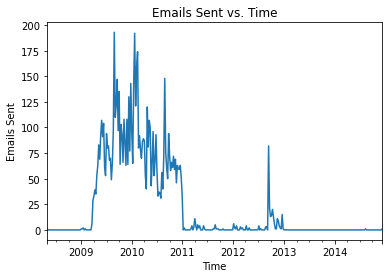

In [173]:
emails['when'] = pd.to_datetime(emails['MetadataDateSent'])

emails_dateindex = emails.set_index('when')
emails_dateindex['Id'].resample('1W').count().plot()

plt.xlabel('Time')
plt.ylabel('Emails Sent')
plt.title('Emails Sent vs. Time')

In order to find the amount of emails that were sent each week, I first converted the 'MetadataDateSent' column to datetime format and made that the index of the dataframe. Then, I plotted a count of the number of emails that were sent each week on a line graph and properly labelled it. With this graph, we can determine that the most emails were sent in 2009 and  2010, with a small spike in late 2012.

### Q4: (2 points)
How many times is Donald Trump mentioned in the emails?

In [174]:
pattern = r'[dD]onald [tT]rump'
emails['RawText'].str.contains(pattern).sum()

1

To find the number of times that Donald Trump is mentioned in the emails, I looked for the amount of times that the words 'Donald Trump' appeared together within the 'RawText' column of the emails dataframe. Donald Trump was mentioned once within the emails.

### Q5: (3 points)
How many email messages contain references to Libya or Syria in their Subject lines? (Note that this encompasses "Libya", "Libyan", "Syria", "Syrian", and other cases where Libya or Syria is part of a string.)

In [175]:
pattern = r'syria(n)?|libya(n)?'
emails['MetadataSubject'].str.lower().str.contains(pattern).sum()

C:\Users\thebe\AppData\Local\Temp/ipykernel_15992/2460347477.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  emails['MetadataSubject'].str.lower().str.contains(pattern).sum()


108

To find any references to Libya, Libyan, Syria, or Syrian, I used a contains function to find when the words Syria and Libya would appear in a normalized version of the 'MetadataSubject' column. The subjects of these emails make reference to Libya or Syria 108 times.

### Q6: (4 points)
Report the proportions of original emails, replies (signified by subject lines that start with "Re:"), and forwarded messages (signified by subject lines that start with "Fw:").  Note that you should deal with upper- and lower-case variants of those prefixes (e.g. "RE:" is also a valid reply signifier).  The total proportions should add up to 100%.

In [176]:
num_emails = len(emails)

forwarded = emails.ExtractedSubject.str.lower().str.contains('^fw:').sum()
replies = emails.ExtractedSubject.str.lower().str.contains('^re:').sum()

original = num_emails - forwarded - replies

original_prop = (original / num_emails) * 100
re_prop = (replies / num_emails) * 100
fw_prop = (forwarded / num_emails) * 100

display('Original emails: ' + str(original_prop), 'Reply emails: ' + str(re_prop), 'Forwarded emails: ' + str(fw_prop))

'Original emails: 48.04279421019509'

'Reply emails: 32.63687853996224'

'Forwarded emails: 19.320327249842666'

To find the proportions of original emails, replies, and forwarded emails, I started by finding the length of the emails dataframe. Next, I found the amount of times that the phrases 'fw:' and 're:' appeared within the 'ExtractedSubject' column and put them into respective variables for forwardeded emails and replies. Then, to find the number of original emails, I subtracted both forwarded emails and replies from the number of total emails there were in the dataframe. Finally, I found the proportion of original, forwarded, and reply emails based on the amount of total emails in the dataframe. The proportion for original emails was about 48.04%, for reply emails was about 32.64%, and for forwarded emails was about 19.32%.

### Q7: (8 points)
How many email messages are about the election?  Note that you will first need to define your criteria for determining that an email message is "about" the election.  Be sure to include a markdown block explaining your reasoning.

In [177]:
election_emails = emails.ExtractedSubject.str.lower().str.contains('election|electoral|vote|win|lose|republican|democrat').sum()
display(str(election_emails) + ' emails were about the election')

'119 emails were about the election'

In order to find the number of email messages that were about the election, I first determined what words would illustrate that any specific email was about the election. The words I determined to be about the election are as follows: election, electoral, vote, win, lose, republican, and democrat. After determining these words, I found that 119 emails pertained to the election.

### Q8: (9 points)
Using only email messages sent by Hillary Clinton, determine the compound sentiment (as reported by the VADER sentiment intensity analyzer) for each one and create a boxplot for sentiment for each week.  In other words, your boxplot should have one "box" per week, with the x-axis being the week (date) and the y-axis showning the sentiment (with each box showing min, max, median, quartiles, and outliers).

C:\Users\thebe\AppData\Local\Temp/ipykernel_15992/967134161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_emails['sent'] = h_emails['RawText'].apply(lambda text:sid.polarity_scores(str(text)))
C:\Users\thebe\AppData\Local\Temp/ipykernel_15992/967134161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_emails['compound'] = h_emails['sent'].apply(lambda x: x['compound'])
C:\Users\thebe\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index re

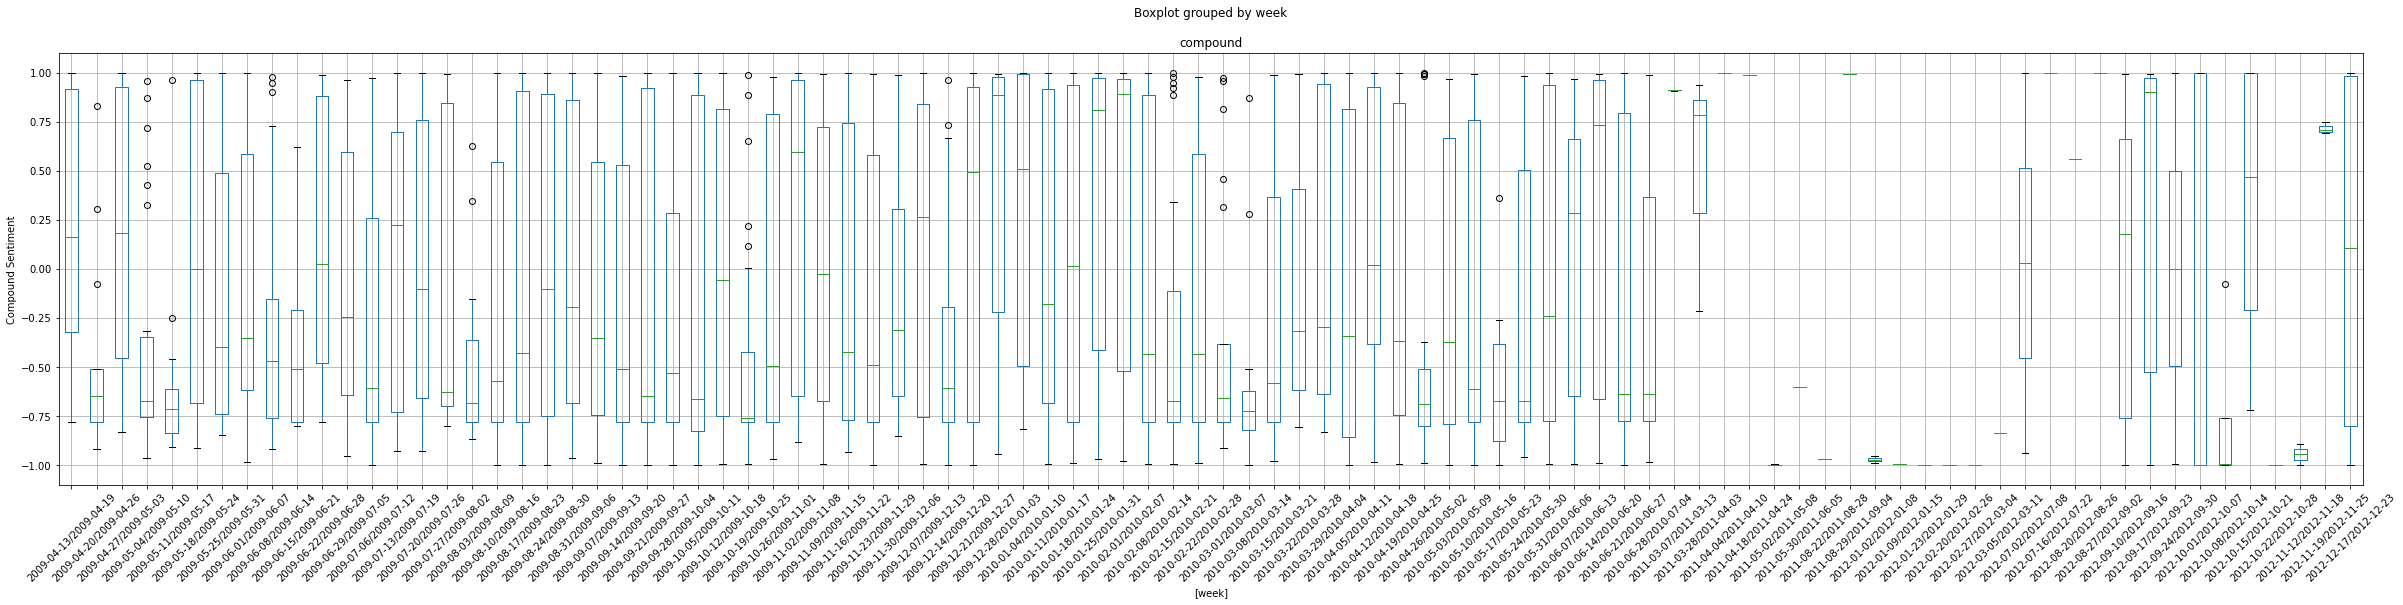

In [178]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

h_emails = emails.loc[emails['MetadataFrom'] == 'H']
h_emails['sent'] = h_emails['RawText'].apply(lambda text:sid.polarity_scores(str(text)))
h_emails['compound'] = h_emails['sent'].apply(lambda x: x['compound'])
h_emails = h_emails.drop('sent',axis=1)

h_emails_dateindex = h_emails.set_index('when')
h_emails_dateindex['week'] = h_emails_dateindex.index.to_period('W')

weeklyh_emails = h_emails_dateindex.drop(['Id', 'SenderPersonId'], 1)
weeklyh_emails.boxplot(by='week', figsize=(40, 8), rot=45)
plt.ylabel('Compound Sentiment')
plt.show()

To create boxplots of the compound sentiment of Hillary Clinton's emails each week, I started by locating all emails sent by her. Next, I found the polarity scores of the 'RawText' column for each of these emails and moved the compound sentiment score to its own column. Then, I set the index as the 'when' column, which was added in a previous question and added a new column that converted the index to weekly periods. Finally, I dropped a few unnecessary columns and created a boxplot of the data with proper labels. From this graph of boxplots, it is hard to make out a clear pattern from Hillary Clinton's emails, but we can determine that her emails contained a wide spectrum of different sentiment scores that varied from week to week.

### Q9: (8 points)
Using Named Entity Recognition, extract PERSONs from the ExtractedBodyText field from Emails.csv for messages sent by Hillary Clinton. Report the top 10 most common PERSONs mentioned in the emails.

In [179]:
def find_person(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)
    entities = nltk.chunk.ne_chunk(tagged)
    try:
        for entity in entities.subtrees():
            if entity.label() == "PERSON":
                name = []
                for leaf in entity.leaves():
                    name.append(leaf[0])
                return (" ".join(name))
    except:
        return ""
h_emails['persons'] = h_emails['ExtractedBodyText'].apply(lambda text:find_person(str(text)))
h_emails.persons.value_counts()[0:15]

Bill         21
IN           17
Pls          10
Jack          9
Jim           8
Holbrooke     8
Cheryl        7
Tom           7
Mike          7
Jones         6
Huma          6
Hillary       6
Shaun         6
Dear          5
Sorry         5
Name: persons, dtype: int64

To find the ten most common 'PERSONs' mentioned in the emails, I used a function presented in class that would tokenize, tag, and chunk the entities in each cell of the 'ExtractedBodyText' column and then determine if the entity could be deemed as a 'PERSON.' Then, I counted the amount of times each name shows up in the 'persons' column that I created. The ten most common 'PERSONs' mentioned in the emails are as follows: Bill, Jack, Jim, Holbrooke, Cheryl, Tom, Mike, Jones, Huma, and Hillary. I decided to not acknowledge a few of the top names that were identified as 'PERSONs,' as I did not believe they were names at all. These include entries such as 'IN' and 'Pls,' among the top 10 most commonly mentioned names. I tried to use the data from the 'RawText' column and was unable to determine people from those columns with these methods. 

____